In [2]:
import pandas as pd


In [3]:
data = pd.read_csv('googleplaystore.csv')

In [4]:
null_values = data.isnull().sum()
print("Number of null values for each column:\n", null_values)

Number of null values for each column:
 App                 0
Category            0
Rating             47
Reviews             0
Size              129
Installs            0
Type                0
Price               0
Content Rating      0
Genres              0
Last Updated        0
Current Ver         0
Android Ver         0
dtype: int64


In [5]:
data.dropna(inplace=True)

In [6]:
data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else str(x))
data['Size'] = data['Size'].apply(lambda x: float(x.replace('k', ''))/1024 if 'k' in str(x) else float(x))

In [7]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

data['Installs'] = data['Installs'].apply(lambda x: int(x.replace('+', '').replace(',', '')))

data['Price'] = data['Price'].apply(lambda x: float(x.replace('$', '')))


In [8]:
data = data[(data['Rating'] >= 1) & (data['Rating'] <= 5)]
data = data[data['Reviews'] <= data['Installs']]
data = data[~((data['Type'] == 'Free') & (data['Price'] > 0))]

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

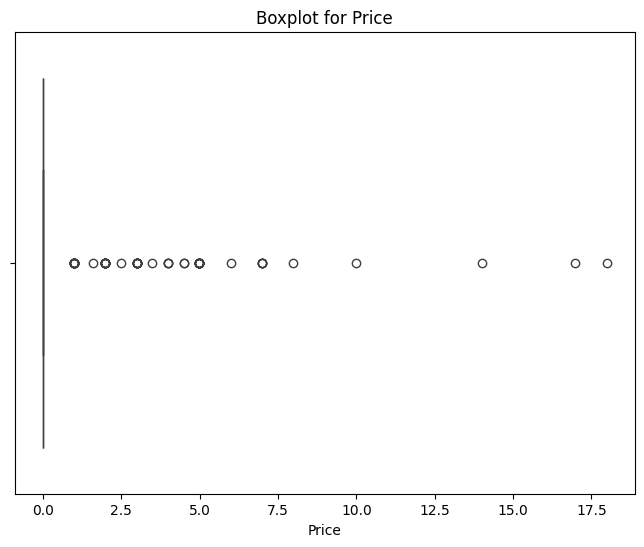

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Price'])
plt.title('Boxplot for Price')
plt.show()

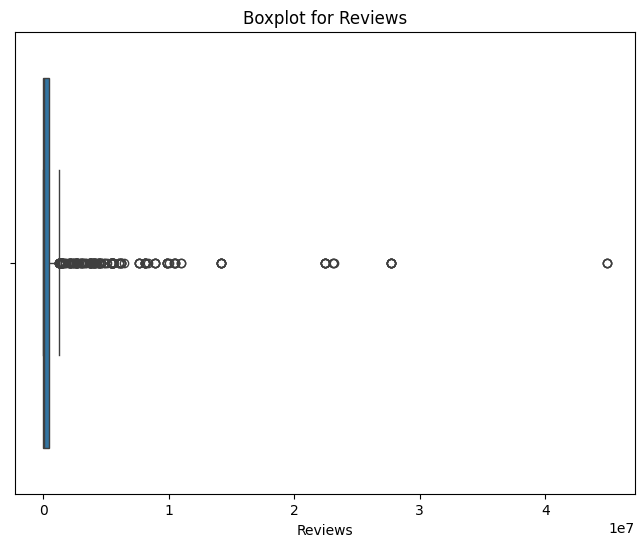

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Reviews'])
plt.title('Boxplot for Reviews')
plt.show()

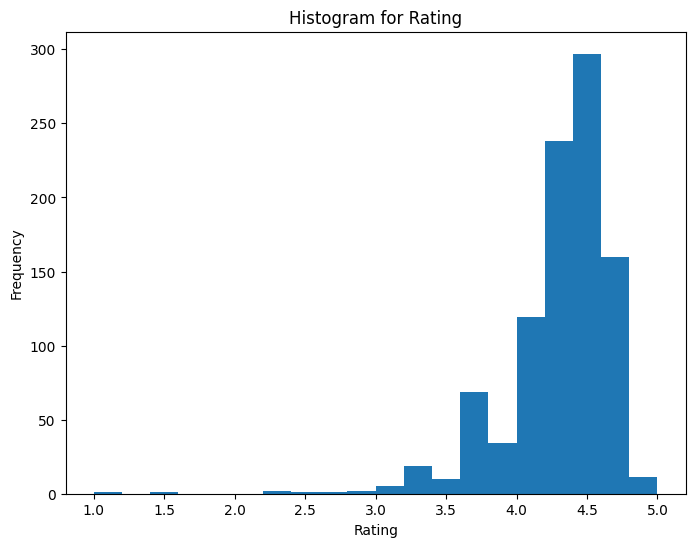

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(data['Rating'], bins=20)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram for Rating')
plt.show()

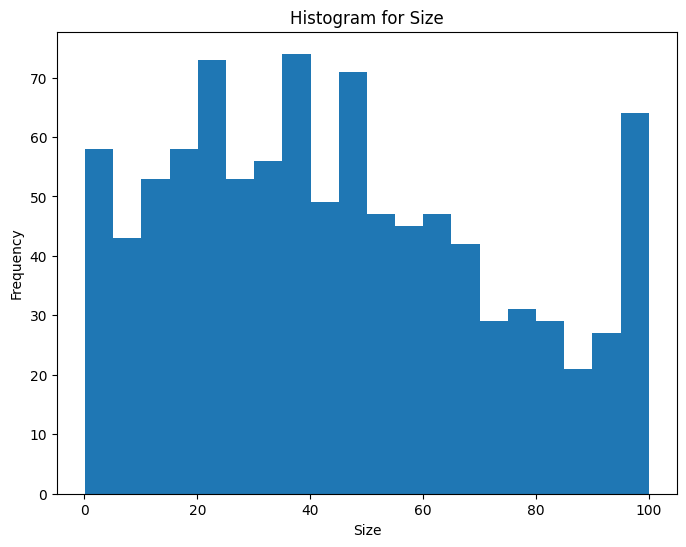

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(data['Size'], bins=20)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Histogram for Size')
plt.show()

In [16]:
data = data[data['Price'] < 200]
data = data[data['Reviews'] <= 2000000] # Set threshold for high reviews
percentiles = data['Installs'].quantile([0.1, 0.25, 0.5, 0.7, 0.90, 0.95, 0.99])
data = data[data['Installs'] <= percentiles[0.99]] # Drop records with high installs based on threshold

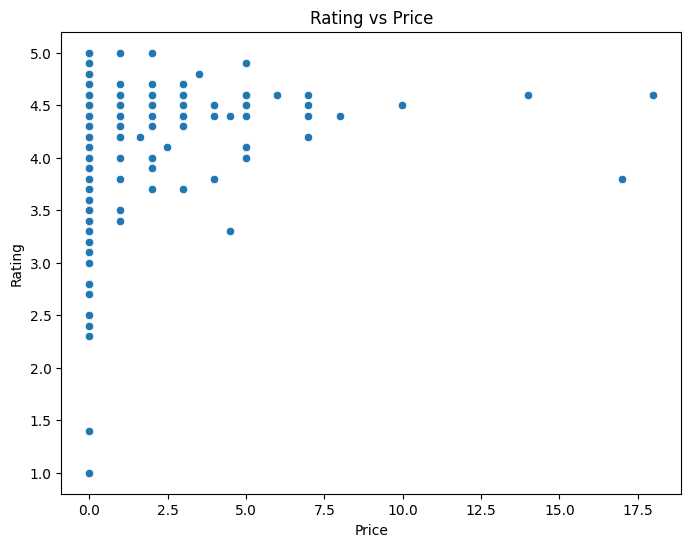

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Price'], y=data['Rating'])
plt.title('Rating vs Price')
plt.show()

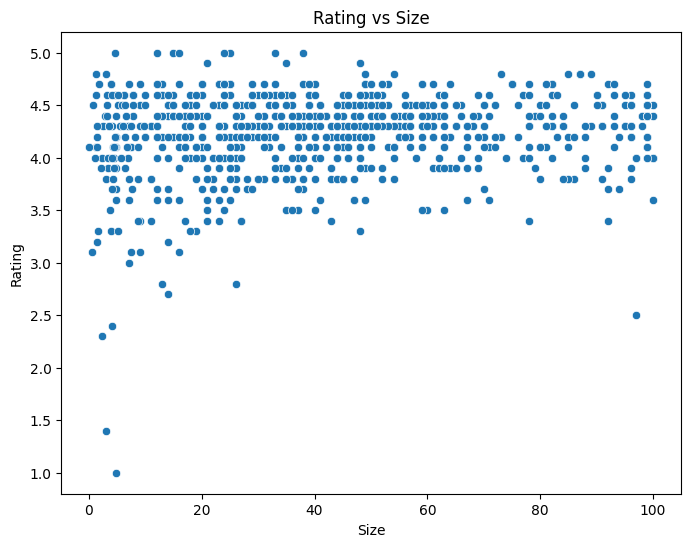

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Size'], y=data['Rating'])
plt.title('Rating vs Size')
plt.show()

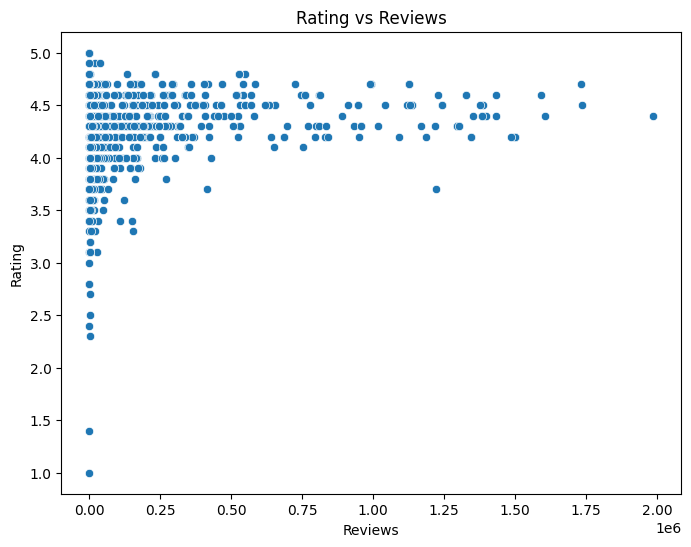

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Reviews'], y=data['Rating'])
plt.title('Rating vs Reviews')
plt.show()

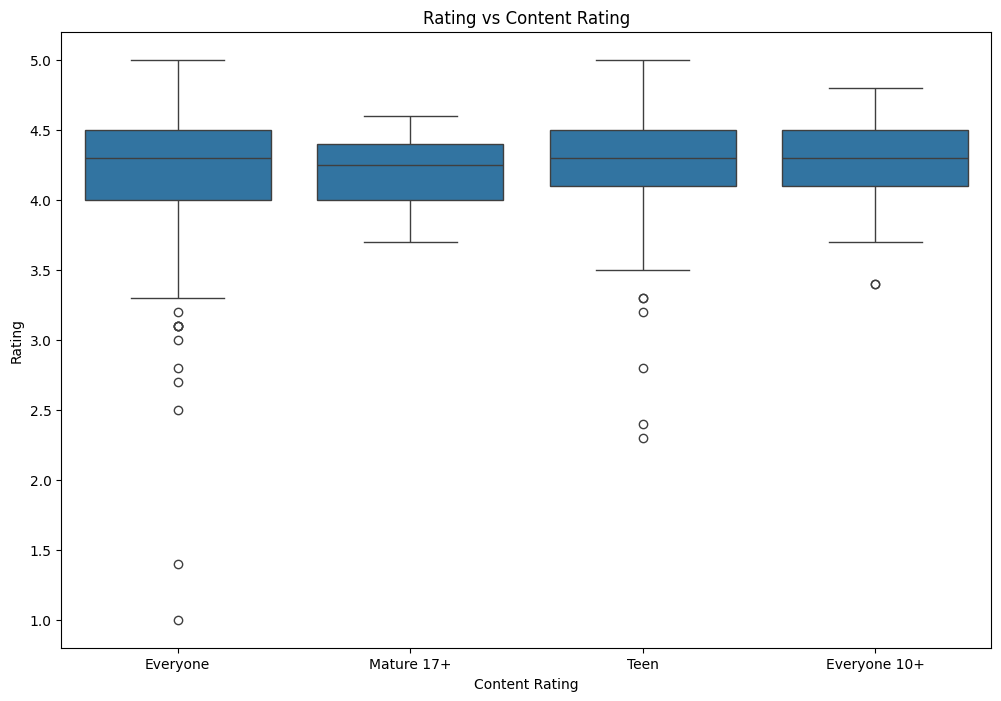

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=data['Content Rating'], y=data['Rating'])
plt.title('Rating vs Content Rating')
plt.show()

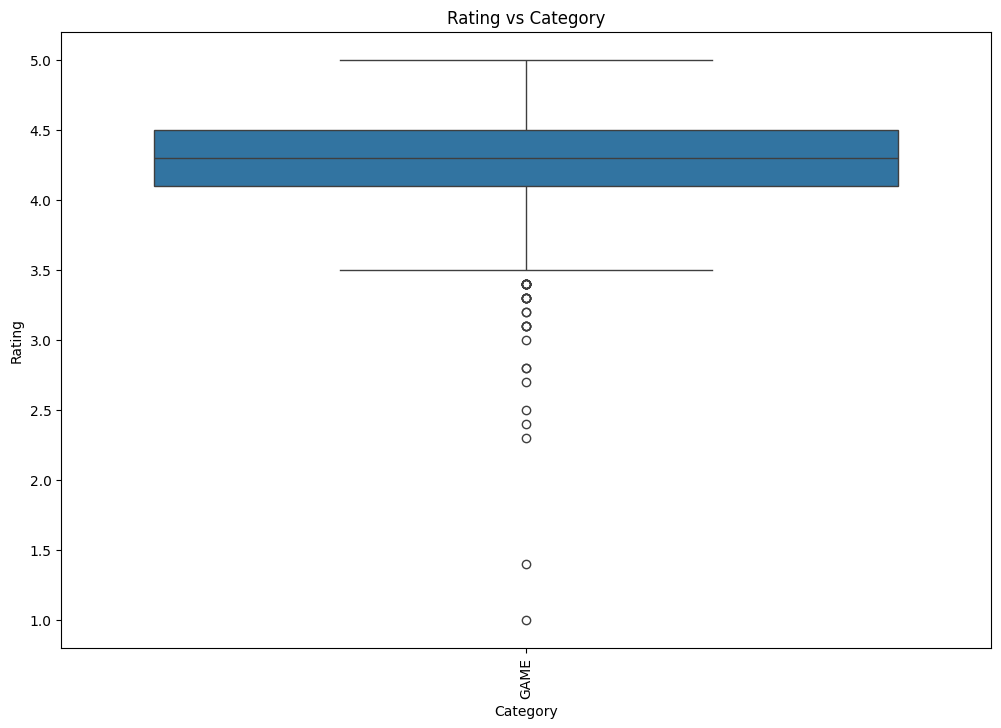

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=data['Category'], y=data['Rating'])
plt.title('Rating vs Category')
plt.xticks(rotation=90)
plt.show()

In [38]:
import numpy as np

inp1 = data.copy()
inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])
inp1.drop(columns=['App', 'Last Updated', 'Current Ver', 'Android Ver'], inplace=True)


In [39]:
inp1 = pd.get_dummies(inp1, columns=['Category', 'Genres', 'Content Rating'], drop_first=True)

In [40]:
numeric_columns = inp1.select_dtypes(include=[np.number]).columns
inp2 = inp1[numeric_columns]


In [41]:
from sklearn.model_selection import train_test_split

X = inp2.drop(columns=['Rating'])
y = inp2['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [43]:
model = LinearRegression()

In [44]:
model.fit(X_train, y_train)

LinearRegression()

In [45]:
train_r2 = model.score(X_train, y_train)
print("R2 on the train set:", train_r2)

R2 on the train set: 0.19496129662798367


In [46]:
y_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
print("R2 on the test set:", test_r2)

R2 on the test set: 0.1106629478235105
